In [1]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
sys.path.append('training/')
sys.path.append('./')
from config_training import config 
sys.path.append('preprocessing/')
from step1 import *
from full_prep import lumTrans
from layers import nms,iou

import glob
import nibabel as nib

/home/anaconda/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
bboxes = glob.glob('/datasets/results/detector_results/res18_mylabel/bbox/*_pbb.npy')

In [55]:
sample_volumes = []
for bbi in bboxes:
    pbb = np.load(bbi)
    pbb = pbb[pbb[:,0]>-1]
    pbb = nms(pbb, 0.05)
    if len(pbb)<4 and len(pbb)>=1:
        for box in pbb:
            if box[3]<10 and box[3]>=5:
                bbi_base_fname = bbi.split('/')[-1][:-8]
                sample_volumes.append(bbi_base_fname)
                print(bbi_base_fname, len(pbb))

('80a3052f4a1b90fd38fd0def7b79b65c', 3)
('f725f46908f16062fd12c141eb47c6a7', 3)
('c979fbec565e769de7e66944ab5365a4', 2)
('7ec258e536a1e0353375295ad1b71e5b', 3)


In [56]:
len(sample_volumes)

4

In [57]:
for svolumei in sample_volumes:
    vol = np.load(os.path.join('/datasets/preprocess/stage1', svolumei + '_clean.npy'))
    vol_nii = nib.Nifti1Image(vol, affine=np.eye(4))
    nib.save(vol_nii, os.path.join('/datasets/sample_volumes', svolumei + '_clean.nii'))

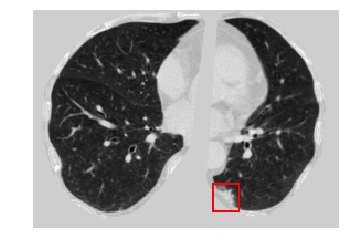

In [70]:
for idx, svolumei in enumerate(sample_volumes):
    if idx==0:
        img = nib.load(os.path.join('/datasets/sample_volumes', svolumei + '_clean.nii')).get_data()
        pbb = np.load(os.path.join('/datasets/sample_volumes/bbox', svolumei + '_pbb.npy'))

        pbb = pbb[pbb[:,0]>-1]
        pbb = nms(pbb,0.05)

        box = pbb[0].astype('int')[1:]

        ax = plt.subplot(1,1,1)
        plt.imshow(img[0,box[0]],'gray')
        plt.axis('off')
        rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
        ax.add_patch(rect)

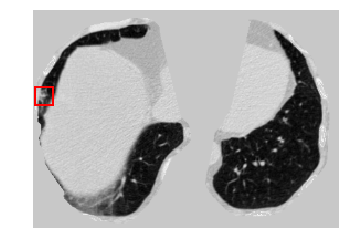

In [71]:
box = pbb[1].astype('int')[1:]
    
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray')
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

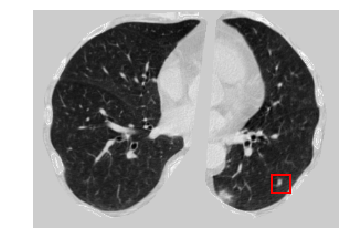

In [72]:
box = pbb[2].astype('int')[1:]
    
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray')
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)